In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
X = np.loadtxt("cafe_x.csv", delimiter=",")
Y = np.loadtxt("cafe_y.csv", delimiter=",")

In [4]:
Y.shape

(200,)

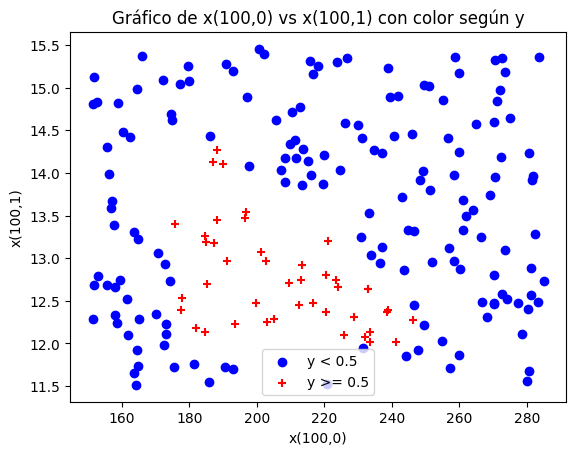

In [5]:
# Definir el umbral para la clasificación (puedes ajustarlo)
umbral = 0.5

# Filtrar los puntos según el valor de y
x_class0 = X[Y < umbral]  # Puntos donde y < umbral (azul)
x_class1 = X[Y >= umbral] # Puntos donde y >= umbral (rojo)

# Graficar puntos con diferente color según y
plt.scatter(x_class0[:, 0], x_class0[:, 1], marker='o', color='blue', label=f"y < {umbral}")
plt.scatter(x_class1[:, 0], x_class1[:, 1], marker='+', color='red', label=f"y >= {umbral}")

# Etiquetas y leyenda
plt.xlabel("x(100,0)")
plt.ylabel("x(100,1)")
plt.title("Gráfico de x(100,0) vs x(100,1) con color según y")
plt.legend()
plt.show()

In [6]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")
print(f"Shape of Y before reshaping: {Y.shape}")
if Y.size == 200:
    Yn = Y.reshape((200, 1))
    print(f"Shape of Y after reshaping: {Yn.shape}")
else:
    print("Error: Y does not have 200 elements and cannot be reshaped to (200, 1)")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70
Shape of Y before reshaping: (200,)
Shape of Y after reshaping: (200, 1)


In [7]:
print(Xn.shape)
print(Yn.shape)

(200, 2)
(200, 1)


In [8]:
Xt = np.tile(Xn, (1000,1))
Yt = np.tile(Yn, (1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [9]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
    ]
)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.05266714  0.9199519  -0.72862875]
 [-0.529958   -0.30856508 -1.0748662 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.7148149 ]
 [-0.45379645]
 [-0.50620437]] 
b2(1,): [0.]


In [12]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt, Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.2596
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1343
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1244
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1137
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0340
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0149
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0098
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0069
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0049
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0035


In [13]:
X_test = np.array([
    [200, 13.9],
    [200,17]])
X_testn= norm_l(X_test)
predicctions = model.predict(X_testn)
print("Predicciones = \n", predicctions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicciones = 
 [[9.6480876e-01]
 [2.2132754e-08]]


In [14]:
yhat = np.zeros_like(predicctions)
for i in range(len(predicctions)):
    if predicctions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisiones = \n{yhat}")

decisiones = 
[[1.]
 [0.]]
